In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import regex as re
from collections import Counter

In [2]:

# Read CSV file into DataFrame
df= pd.read_csv("/Users/sa19/Downloads/gsearch_jobs.csv")

In [3]:
# observe first 5 rows of dataset
df.head()

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql']
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,NaN,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']"
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']"


In [4]:
#observe features of dataset
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [5]:
df.shape

(61953, 27)

In [6]:
df.dtypes

Unnamed: 0               int64
index                    int64
title                   object
company_name            object
location                object
via                     object
description             object
extensions              object
job_id                  object
thumbnail               object
posted_at               object
schedule_type           object
work_from_home          object
salary                  object
search_term             object
date_time               object
search_location         object
commute_time           float64
salary_pay              object
salary_rate             object
salary_avg             float64
salary_min             float64
salary_max             float64
salary_hourly          float64
salary_yearly          float64
salary_standardized    float64
description_tokens      object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  37
via                        9
description                0
extensions                 0
job_id                     0
thumbnail              23759
posted_at                190
schedule_type            246
work_from_home         33973
salary                 51865
search_term                0
date_time                  0
search_location            0
commute_time           61953
salary_pay             51865
salary_rate            51865
salary_avg             51865
salary_min             52441
salary_max             52441
salary_hourly          56053
salary_yearly          57884
salary_standardized    51865
description_tokens         0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,index,commute_time,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized
count,61953.000000,61953.000000,0.0,10088.000000,9512.000000,9512.000000,5900.000000,4069.000000,10088.000000
mean,30976.000000,1139.077333,NaN,42100.231239,34846.281874,50487.856787,40.539588,104115.406718,92289.425683
std,17884.434951,690.256113,NaN,55893.993519,45843.034891,67366.522273,22.214540,36024.388492,43277.933820
min,0.000000,0.000000,NaN,7.250000,8.000000,10.000000,7.250000,29289.840000,15080.000000
25%,15488.000000,553.000000,NaN,31.500000,19.520000,45.000000,23.265000,80000.180000,62400.000000
50%,30976.000000,1111.000000,NaN,60.000000,50.000000,75.000000,33.500000,96500.000000,88400.000000
75%,46464.000000,1685.000000,NaN,92500.000000,77000.000000,110000.000000,55.000000,120000.000000,117500.000000
max,61952.000000,3228.000000,NaN,550000.000000,450000.000000,850000.000000,300.000000,550000.000000,624000.000000


In [9]:
df["date_time"]

0        2023-08-04 03:00:13.797776
1        2023-08-04 03:00:13.797776
2        2023-08-04 03:00:13.797776
3        2023-08-04 03:00:13.797776
4        2023-08-04 03:00:13.797776
                    ...            
61948    2022-11-04 03:40:23.706734
61949    2022-11-24 04:00:08.710801
61950    2022-12-07 04:00:12.563831
61951    2022-12-08 04:00:15.975728
61952    2023-01-25 04:00:26.521124
Name: date_time, Length: 61953, dtype: object

In [10]:
#Transform datetime to just date
df["date"] = pd.to_datetime(df["date_time"]).dt.date
df

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,thumbnail,...,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens,date
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,101K–143K,a year,122000.0,101000.0,143000.0,NaN,122000.0,122000.0,"['tableau', 'r', 'python', 'sql']",2023-08-04
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023-08-04
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['sql'],2023-08-04
3,3,3,Data Analyst - Consumer Goods - Contract to Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,NaN,...,15–25,an hour,20.0,15.0,25.0,20.0,NaN,41600.0,"['powerpoint', 'excel', 'power_bi']",2023-08-04
4,4,4,Data Analyst | Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,https://encrypted-tbn0.gstatic.com/images?q=tb...,...,90K–110K,a year,100000.0,90000.0,110000.0,NaN,100000.0,100000.0,"['powerpoint', 'excel', 'outlook', 'word']",2023-08-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61948,61948,955,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,NaN,...,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['power_bi', 'tableau', 'excel', 'snowflake', ...",2022-11-04
61949,61949,956,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],2022-11-24
61950,61950,957,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],2022-12-07
61951,61951,958,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,NaN,...,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[],2022-12-08


In [11]:
#Drop  salary features excluding salary avg, drop "posted_at" &"Thumbnail"
df.drop(columns=["salary","salary_pay","salary_rate","salary_min","salary_max","salary_hourly","salary_yearly","salary_standardized","posted_at","thumbnail","commute_time"],inplace=True)

**I noticed that several features contain a large number of null values. One particularly important column with missing data is "salary", which is vital to my analysis. Given the extent of missing data, I’m considering removing the column or limiting the analysis to entries where salary is available.**

In [12]:
#check for dupilcates 
df[df.duplicated("job_id")]

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,schedule_type,work_from_home,search_term,date_time,search_location,salary_avg,description_tokens,date
838,838,838,"Lead Data Analyst, CRM Marketing",Hims & Hers,Anywhere,Indeed,Hims & Hers is the leading health and wellness...,"['3 days ago', '140K–180K a year', 'Work from ...",eyJqb2JfdGl0bGUiOiJMZWFkIERhdGEgQW5hbHlzdCwgQ1...,Full-time,True,data analyst,2025-04-05 03:00:08.199243,United States,160000.0,"['tableau', 'looker', 'sql', 'r', 'python']",2025-04-05
853,853,853,We Work Remotely – Online Data Analyst – USA,vmysmartpros,Anywhere,Mysmartpros,Job title: Online Data Analyst\n\nCompany: We ...,"['7 hours ago', 'Work from home', 'Full-time',...",eyJqb2JfdGl0bGUiOiJXZSBXb3JrIFJlbW90ZWx5IOKAky...,Full-time,True,data analyst,2025-04-07 03:00:11.353452,United States,NaN,['go'],2025-04-07
854,854,854,Virtual Data Analyst​/Entry level​/Remote,vmysmartpros,Anywhere,Mysmartpros,[ad_1]\n\nPosition: Virtual Data Analyst / Ent...,"['7 hours ago', 'Work from home', 'Full-time']",eyJqb2JfdGl0bGUiOiJWaXJ0dWFsIERhdGEgQW5hbHlzdO...,Full-time,True,data analyst,2025-04-07 03:00:11.353452,United States,NaN,"['tableau', 'power_bi', 'r', 'python', 'sql']",2025-04-07
859,859,859,"United States (Remote) Senior Data Analyst, Ma...",vmysmartpros,Anywhere,Mysmartpros,"United States (Remote) Senior Data Analyst, Ma...","['7 hours ago', 'Work from home', 'Full-time',...",eyJqb2JfdGl0bGUiOiJVbml0ZWQgU3RhdGVzIChSZW1vdG...,Full-time,True,data analyst,2025-04-07 03:00:12.802673,United States,NaN,"['tableau', 'looker', 'sql']",2025-04-07
861,861,861,"Meta – Data Analyst, BPE – Austin, TX",vmysmartpros,Anywhere,Mysmartpros,"Job title: Data Analyst, BPE\n\nCompany: Meta\...","['7 hours ago', 'Work from home', 'Full-time',...",eyJqb2JfdGl0bGUiOiJNZXRhIOKAkyBEYXRhIEFuYWx5c3...,Full-time,True,data analyst,2025-04-07 03:00:14.124753,United States,NaN,"['tableau', 'sql', 'r', 'python']",2025-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31020,31020,1372,HRIS Reporting and Data Analyst,JAB Recruitment,"Lakewood, CO",BeBee,Job Description\n\nA JAB Recruitment client is...,"['15 hours ago', 'Contractor', 'No degree ment...",eyJqb2JfdGl0bGUiOiJIUklTIFJlcG9ydGluZyBhbmQgRG...,Contractor,NaN,data analyst,2025-02-25 04:00:11.604969,United States,NaN,[],2025-02-25
31021,31021,1373,Business Analyst-MA,ATC,United States,LinkedIn,About Us:\n\nAmerican Technology Consulting (A...,"['15 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJCdXNpbmVzcyBBbmFseXN0LU1BIi...,Full-time,NaN,data analyst,2025-02-25 04:00:11.604969,United States,NaN,"['powerpoint', 'word', 'jira', 'excel', 'power...",2025-02-25
31027,31027,1379,Analyst,High Country: Private Equity Search,"Denver, CO",LinkedIn,"With over a decade of experience in acquiring,...","['7 hours ago', '90K–115K a year', 'Full-time']",eyJqb2JfdGl0bGUiOiJBbmFseXN0IiwiY29tcGFueV9uYW...,Full-time,NaN,data analyst,2025-02-25 04:00:16.285422,United States,102500.0,[],2025-02-25
31040,31040,1392,Sr. Tableau Developer,CGS,United States,LinkedIn,"Employment Type: Full-Time, Experienced\n\nDep...","['8 hours ago', 'Full-time', 'Paid time off', ...",eyJqb2JfdGl0bGUiOiJTci4gVGFibGVhdSBEZXZlbG9wZX...,Full-time,NaN,data analyst,2025-02-25 04:00:17.786076,United States,NaN,"['tableau', 'sql']",2025-02-25


**While checking for duplicates in the job_id column, I identified 3,178 duplicate entries. I will remove these duplicates during the analysis to ensure consistency and accuracy in the results.**


In [13]:
# Remove duplicates from "Job_id" and keep those that were posted first
df = df.drop_duplicates(subset="job_id", keep="first")

In [14]:
df_loc =df.value_counts("location")
df_loc.to_frame()

,count
location,
Anywhere,18042
United States,9989
Anywhere,8339
United States,5109
"Oklahoma City, OK",1025
...,...
"Danville, AR",1
"Cherokee Village, AR",1
"Charleston, AR",1


In [15]:
# Let's get a value count of "work_from_home" postions
df_WFH =df.value_counts("work_from_home")
df_WFH.to_frame()

,count
work_from_home,
True,26379


In [16]:
#Remove any strange charater from "title"
df["title"] = df["title"].str.replace(r"[^a-zA-Z0-9\s,./\-&()]", "", regex=True)

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/4022178394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title"] = df["title"].str.replace(r"[^a-zA-Z0-9\s,./\-&()]", "", regex=True)


In [17]:
# Check for any strange charaters
df['title'].str.contains(r'[$]').sum()

np.int64(0)

In [18]:
# capitalize the first letter 
df["title"]= df["title"].str.title()
df_title =df.value_counts("title")
df_title.to_frame()

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/2754250352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title"]= df["title"].str.title()


,count
title,
Data Analyst,6451
Senior Data Analyst,1719
Data Scientist,938
Data Analyst Ii,666
Business Data Analyst,500
...,...
Data Science 100-Day Strategy,1
Data Science / Software Engineering (Upaid Internship - Open To...,1
Data Science - Statistics Cost Distribution Analysis,1


In [19]:
#value count of "company_name"
df_cname =df.value_counts("company_name")
df_cname.to_frame()

,count
company_name,
Upwork,7526
Talentify.io,2113
Walmart,1800
Dice,862
EDWARD JONES,747
...,...
Levelwing,1
LevelUp²,1
LevelUP,1


In [20]:
#value count of "salary_avg"
df_salary=df.value_counts("salary_avg")
df_salary.to_frame()

,count
salary_avg,
96500.000,415
57.500,296
25.000,243
30.000,239
100000.000,224
...,...
74300.000,1
74520.500,1
74676.000,1


**When reviewing the avg_salary feature, I noticed that it contains both hourly and yearly pay formats. I plan to standardize this feature by converting hourly wages into annual salaries. However, I anticipate some challenges, as certain roles may be contract-based, part-time, or internships, which could affect the accuracy of the conversion.**

In [21]:
#value count of "schedule_type"
df_schedule=df.value_counts("schedule_type")
df_schedule.to_frame()

,count
schedule_type,
Full-time,42322
Contractor,9170
Contractor and Temp work,3126
Full-time and Part-time,1138
Part-time,937
Internship,482
Full-time and Contractor,349
Full-time and Temp work,283
Full-time and Internship,185


In [43]:

#Define degree pattern
degree_pattern = r"(Bachelor(?:'s)?|BA|BS|BSc|Master(?:'s)?|MS|MSc|MBA|PhD|Doctorate|degree in [A-Za-z ]+)"

#Extract degree mentions
df["Degree_Requirement"] = df["description"].str.findall(degree_pattern, flags=re.IGNORECASE)

# Clean and join matches into one string
df["Degree_Requirement"] = df["Degree_Requirement"].apply(
    lambda x: ", ".join(set([i.strip().title() for i in x])) if x else None
)

#Create binary flags
degree_keywords = {
    "Bachelor": ["bachelor", "ba", "bs", "bsc"],
    "Master": ["master", "ms", "msc"],
    "MBA": ["mba"],
    "PhD": ["phd", "doctorate"]
}

for degree, keywords in degree_keywords.items():
    df[f"Has_{degree}"] = df["Degree_Requirement"].str.lower().apply(
        lambda text: int(any(kw in text for kw in keywords)) if isinstance(text, str) else 0
    )

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3553737526.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Degree_Requirement"] = df["description"].str.findall(degree_pattern, flags=re.IGNORECASE)
/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3553737526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Degree_Requirement"] = df["Degree_Requirement"].apply(
/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3553737526.py:21: SettingWithCopyWarning:

In [49]:

# Example function to extract min years experience (from before)
exp_pattern = r'(?i)(?:at least|min(?:imum)? of)?\s*(\d+)\+?\s*(?:[-–to]{1,3}\s*(\d+))?\s+years?'

def extract_min_experience(text):
    matches = re.findall(exp_pattern, text)
    if matches:
        return int(matches[0][0])
    else:
        return np.nan

# Extract min years from description
df["Min_Years_Experience"] = df["description"].apply(extract_min_experience)

# Handle missing (optional: fill with 0 or keep NaN)
df["Min_Years_Experience"].fillna(0, inplace=True)

# Step 1: Bin the experience years
def bin_experience(min_years):
    if pd.isna(min_years):
        return "Not Specified"
    elif min_years <= 3:
        return "0-3 years"
    elif 4 <= min_years <= 6:
        return "4-6 years"
    else:
        return "7+ years"

df["Experience_Bin"] = df["Min_Years_Experience"].apply(bin_experience)

# Step 2: Map bins to seniority levels
def seniority_level(exp_bin):
    if exp_bin in ["0-3 years", "No Experience Required"]:
        return "Entry-Level"
    elif exp_bin == "4-6 years":
        return "Mid-Level"
    elif exp_bin == "7+ years":
        return "Senior-Level"
    else:
        return "Unknown"

df["Seniority_Level"] = df["Experience_Bin"].apply(seniority_level)


/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/1251701572.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Min_Years_Experience"] = df["description"].apply(extract_min_experience)
/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/1251701572.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the o

0           Mid-Level
1         Entry-Level
2         Entry-Level
3         Entry-Level
4         Entry-Level
             ...     
61948     Entry-Level
61949    Senior-Level
61950    Senior-Level
61951    Senior-Level
61952    Senior-Level
Name: Seniority_Level, Length: 58775, dtype: object

In [44]:
# List of visa keywords to check for
visa_keywords = ["h-1b', 'h1b', 'h-2b', 'l-1a', 'l-1b', 'o-1', 'eb-2', 'eb2', 'eb-3', 'eb3', 'visa sponsorship"]

# Function to return 1 if any visa keyword is found in the description, else 0
def binary_visa_flag(description):
    desc = str(description).lower()  # ensure description is a string
    return int(any(kw in desc for kw in visa_keywords))

# Add the binary column to your existing DataFrame
df["visa_sponsorship_flag"] = df["description"].apply(binary_visa_flag)


/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/1765250903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["visa_sponsorship_flag"] = df["description"].apply(binary_visa_flag)


In [25]:
# List of desired technical skills
skills = [
    "Python", "R", "SQL", "Java", "Scala", "Excel", "Microsoft Excel", "Tableau", "Power BI", 
    "Looker", "Google Sheets", "Matplotlib", "Seaborn", "Apache Airflow", "dbt", "Apache NiFi", 
    "SSIS", "Informatica", "Talend", "MySQL", "PostgreSQL", "Oracle", "Redshift", "Snowflake", 
    "BigQuery", "MongoDB", "AWS", "Azure", "GCP", "Google Cloud Platform", "Apache Spark", 
    "Hadoop", "Kafka", "Hive", "Presto", "Docker", "Kubernetes", "Terraform", "Git", "GitHub", 
    "Scikit-learn", "TensorFlow", "Keras", "XGBoost", "Pandas", "NumPy"
]

# Make sure description has no missing values
df["description"] = df["description"].fillna("")

# Create one column for each skill (True if the skill is mentioned)
for skill in skills:
    df[skill] = df["description"].str.contains(rf"\b{re.escape(skill)}\b", case=False, regex=True).astype(int)


# Create a list of skills found in each row
def find_skills(text):
    return [skill for skill in skills if re.search(rf"\b{re.escape(skill)}\b", text, re.IGNORECASE)]

df["skills_found"] = df["description"].apply(find_skills)

# Count how often each skill appears
all_skills = [skill for row in df["skills_found"] for skill in row]
skill_counts = Counter(all_skills)

# Put into a DataFrame
skill_df = pd.DataFrame(skill_counts.most_common(20), columns=["Skill", "Frequency"])
df


/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3496959487.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description"] = df["description"].fillna("")
/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3496959487.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[skill] = df["description"].str.contains(rf"\b{re.escape(skill)}\b", case=False, regex=True).astype(int)
/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3496959487.py:16: SettingWithCopyWar

,Unnamed: 0,index,title,company_name,location,via,description,extensions,job_id,schedule_type,...,Terraform,Git,GitHub,Scikit-learn,TensorFlow,Keras,XGBoost,Pandas,NumPy,skills_found
0,0,0,Data Analyst,Meta,Anywhere,via LinkedIn,In the intersection of compliance and analytic...,"['15 hours ago', '101K–143K a year', 'Work fro...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,Full-time,...,0,0,0,0,0,0,0,0,0,"[Python, R, SQL, Tableau, Hadoop, Hive]"
1,1,1,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,Full-time,...,0,0,0,0,0,0,0,0,0,[]
2,2,2,Aeronautical Data Analyst,"Garmin International, Inc.","Olathe, KS",via Indeed,Overview:\n\nWe are seeking a full-time...\nAe...,"['18 hours ago', 'Full-time']",eyJqb2JfdGl0bGUiOiJBZXJvbmF1dGljYWwgRGF0YSBBbm...,Full-time,...,0,0,0,0,0,0,0,0,0,[SQL]
3,3,3,Data Analyst - Consumer Goods - Contract To Hire,Upwork,Anywhere,via Upwork,Enthusiastic Data Analyst for processing sales...,"['12 hours ago', '15–25 an hour', 'Work from h...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBDb25zdW...,Contractor,...,0,0,0,0,0,0,0,0,0,"[Excel, Microsoft Excel, Power BI]"
4,4,4,Data Analyst Workforce Management,Krispy Kreme,United States,via LinkedIn,Overview of Position\n\nThis position will be ...,"['7 hours ago', '90K–110K a year', 'Contractor']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgfCBXb3JrZm...,Contractor,...,0,0,0,0,0,0,0,0,0,[Excel]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61948,61948,955,Marketing Data & Bi Analyst Ii,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",eyJqb2JfdGl0bGUiOiJNYXJrZXRpbmcgRGF0YSBcdTAwMj...,Full-time,...,0,0,0,0,0,0,0,0,0,"[Python, R, SQL, Excel, Tableau, Power BI, Sno..."
61949,61949,956,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,Full-time,...,0,0,0,0,0,0,0,0,0,[]
61950,61950,957,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,Full-time,...,0,0,0,0,0,0,0,0,0,[]
61951,61951,958,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",eyJqb2JfdGl0bGUiOiJMZWFkLURhdGEgQW5hbHlzdCIsIm...,Full-time,...,0,0,0,0,0,0,0,0,0,[]


### Univarate Analysis

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3063142917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["location"]= df["location"].str.strip()
/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/3063142917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["location"] = df["location"].str.replace(r"[^a-zA-Z0-9\s,./\-&()]", "", regex=True)


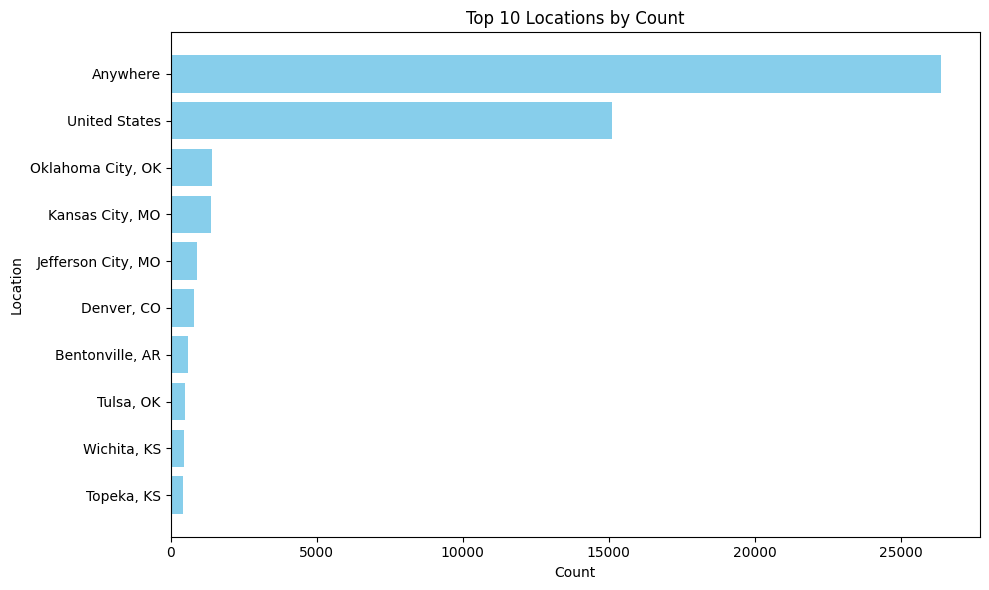

In [26]:
# distrubtion of actual job "locations"
#Remove leading and trailing white space in "location"
df["location"]= df["location"].str.strip()
agg_df=df.groupby("location").size().reset_index(name="Count")
agg_df
#Remove any strange charater from "location"
df["location"] = df["location"].str.replace(r"[^a-zA-Z0-9\s,./\-&()]", "", regex=True)

#Remove leading and trailing white space in "location"
#df["location"]= df["location"].str.strip()

agg_df = df["location"].value_counts().nlargest(10).reset_index()
agg_df.columns = ["location", "Count"]

plt.figure(figsize=(10, 6))
plt.barh(agg_df["location"], agg_df["Count"], color="skyblue")
plt.xlabel("Count")
plt.ylabel("Location")
plt.title("Top 10 Locations by Count")
plt.gca().invert_yaxis()  # puts the highest at the top
plt.tight_layout()
plt.show()

**locations that are the most reoccuring with in our dataset is Anywhere and United states. when interpering this graph i question if anywhere means anywhere within the united states or anywhere in the world. As for the 2nd top ranked the united states a assume it means anywhere within the united states**

Text(0, 0.5, 'Title')

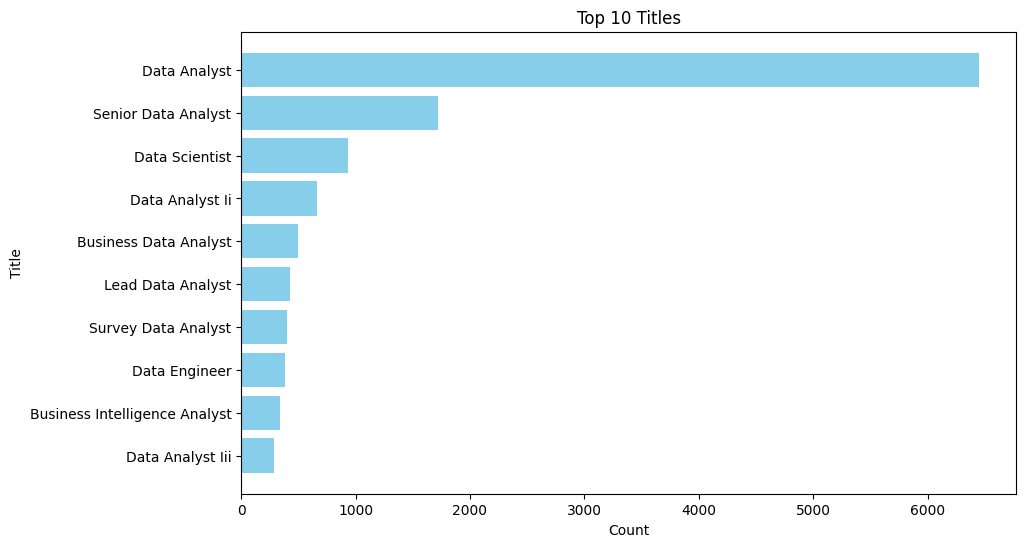

In [27]:
# plot top 10 job "title" within the dataset
title_df = df["title"].value_counts().nlargest(10).reset_index()
title_df.columns = ["title", 'Count']

plt.figure(figsize=(10, 6))
plt.barh(title_df["title"], title_df['Count'], color='skyblue')
plt.title("Top 10 Titles")
plt.gca().invert_yaxis() 
plt.xlabel("Count")
plt.ylabel("Title")


In [28]:
# Fill any missing titles with an empty string
df["title"] = df["title"].fillna("")

# Get counts for each keyword
analysis = df["title"].str.contains("analyst", case=False).sum()
scientist = df["title"].str.contains("scientist", case=False).sum()
engineer = df["title"].str.contains("engineer", case=False).sum()

# Put the results in a dictionary
role_counts = {
    "Analyst": analysis,
    "Scientist": scientist,
    "Engineer": engineer
}

# Turn the dictionary into a DataFrame
role_counts_df = pd.DataFrame(list(role_counts.items()), columns=["Role", "Count"])
# Show the result
role_counts_df

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/4244766179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["title"] = df["title"].fillna("")


,Role,Count
0,Analyst,45805
1,Scientist,3020
2,Engineer,2003


/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/4226313410.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_df, x='Skill', y='Frequency', palette='crest')


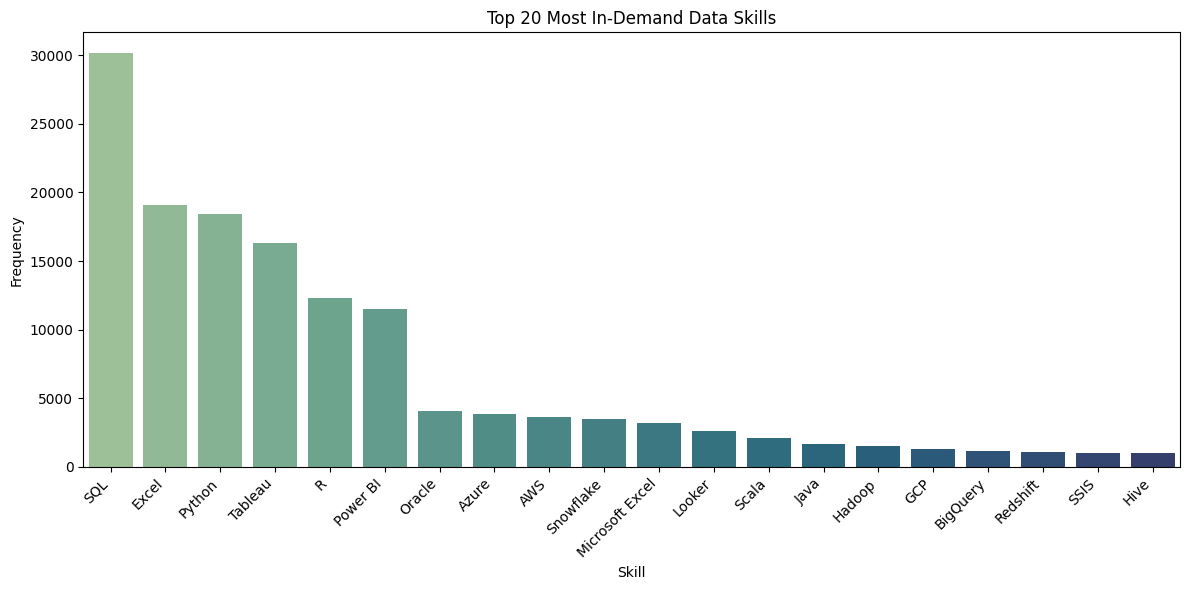

In [29]:
# Plot top 20 skills
plt.figure(figsize=(12, 6))
sns.barplot(data=skill_df, x='Skill', y='Frequency', palette='crest')
plt.title("Top 20 Most In-Demand Data Skills")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [30]:
# Remove "via" from the beginning of entries to standardize this feature
df["via"] = df["via"].str.replace(r'(?i)^via\s+', '',regex=True)

/var/folders/rg/csr6nvbs3kn2m8d77jr48cqw0000gn/T/ipykernel_3731/1564141657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["via"] = df["via"].str.replace(r'(?i)^via\s+', '',regex=True)


In [31]:
#value count of "via"
df_via = df.value_counts("via").reset_index()
df_via.columns = ["via", "Count"]

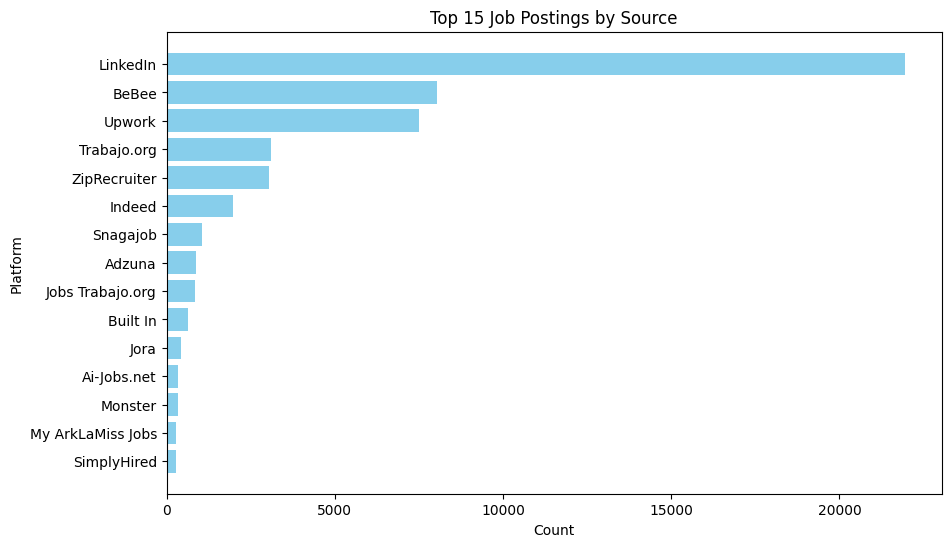

In [32]:
# Get top 15 sources from 'via' column
via_df = df["via"].value_counts().nlargest(15).reset_index()
via_df.columns = ["Source", "Count"]

# Plot bar graph of top  job platforms 
plt.figure(figsize=(10, 6))
plt.barh(via_df["Source"], via_df["Count"], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Job Postings by Source")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

## Bivariate Analysis

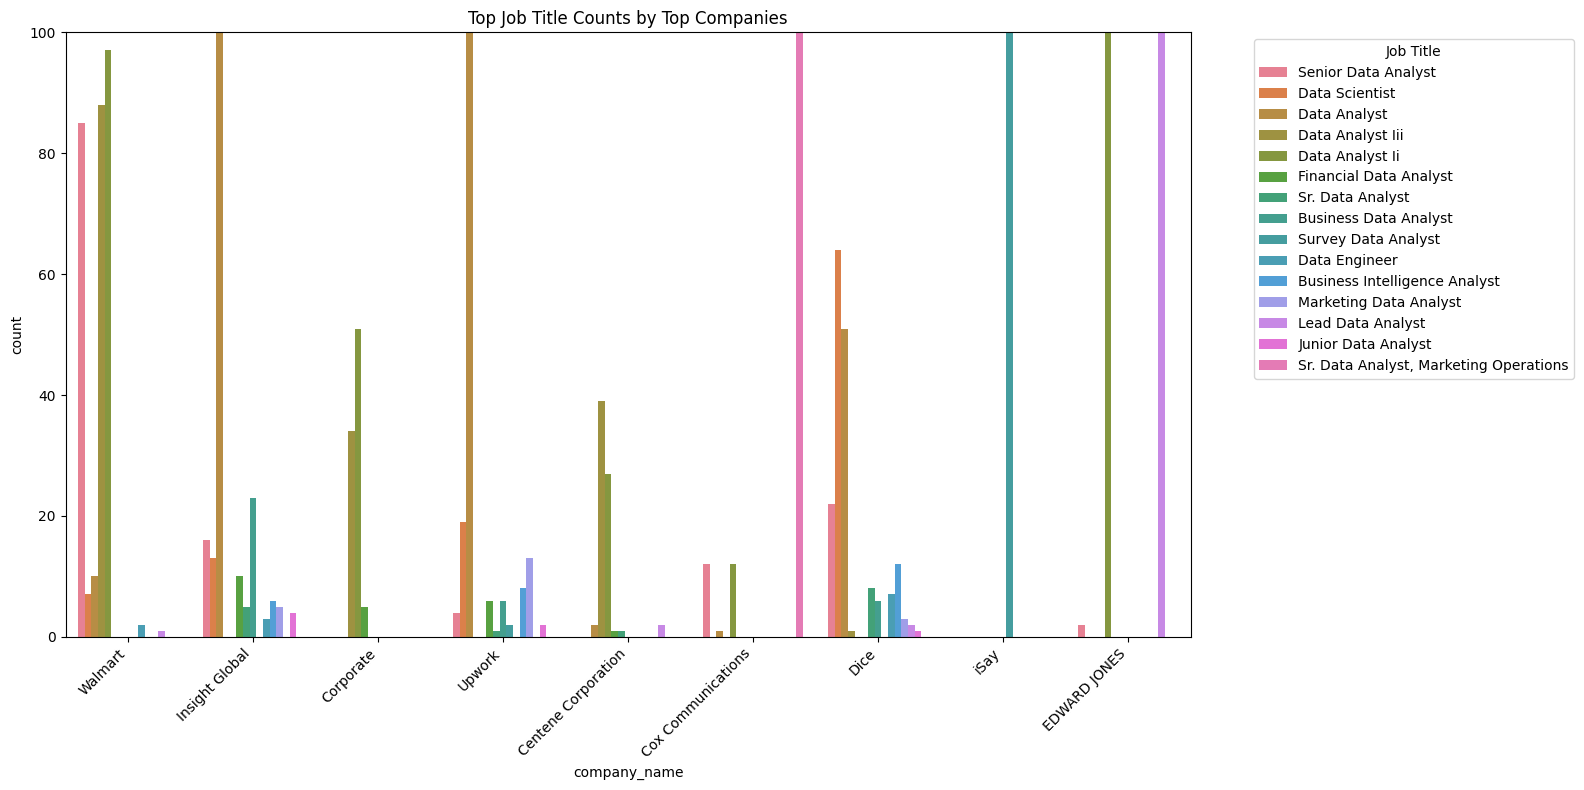

In [33]:
# Get top 10 companies and top 15 job titles
top_companies = df["company_name"].value_counts().nlargest(10).index
top_titles = df["title"].value_counts().nlargest(15).index

filtered_comp_df = df[df["company_name"].isin(top_companies) & df["title"].isin(top_titles)]

plt.figure(figsize=(16,8))
sns.countplot(data=filtered_comp_df, x="company_name", hue="title")
plt.title('Top Job Title Counts by Top Companies')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

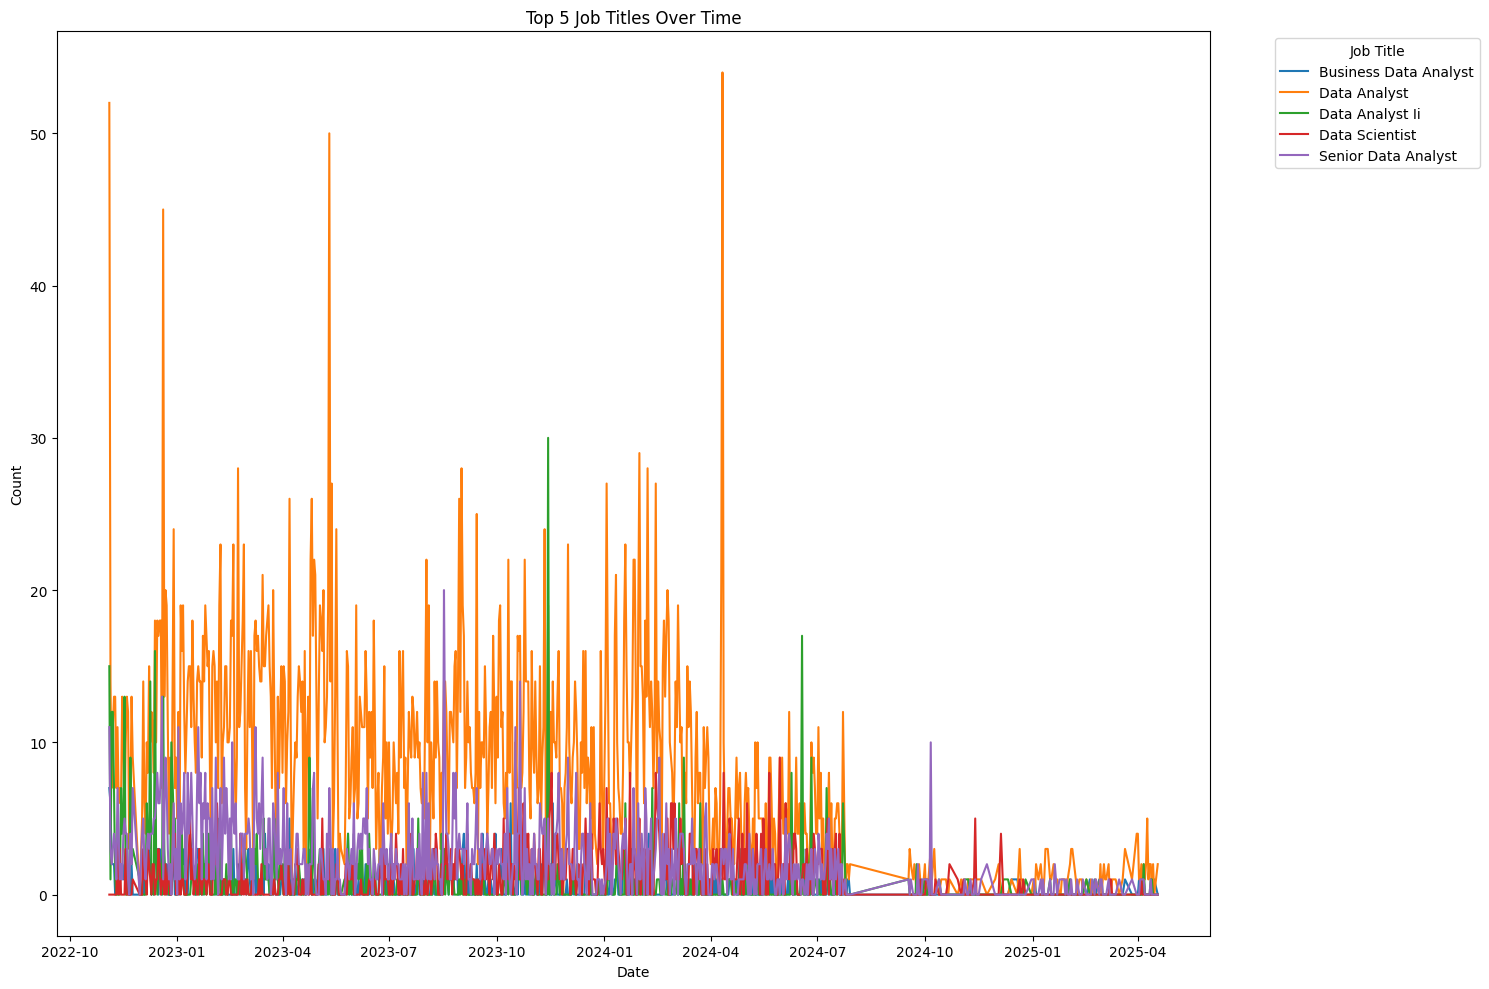

In [34]:
top_titles = df["title"].value_counts().nlargest(5).index
filtered_df = df[df["title"].isin(top_titles)]

schedule_trend = filtered_df.groupby(["date", "title"]).size().unstack(fill_value=0)
schedule_trend.plot(kind='line', figsize=(15,10))

plt.title('Top 5 Job Titles Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


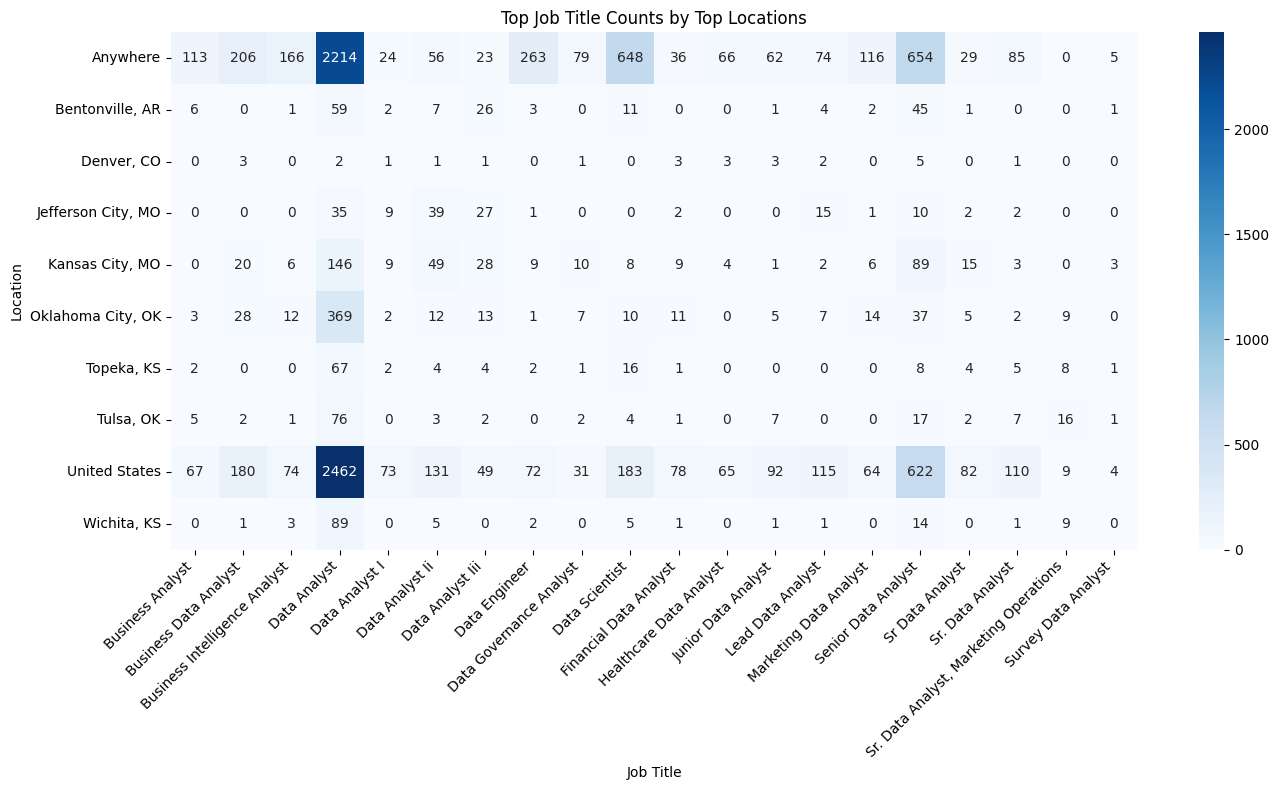

In [35]:
# Get top 10 locations by number of job postings
top_locations = df["location"].value_counts().nlargest(10).index

# Get top 20 job titles by number of postings
top_titles = df["title"].value_counts().nlargest(20).index

# Filter dataframe to only those top categories
filtered_df = df[df["location"].isin(top_locations) & df['title'].isin(top_titles)]

# Group and count occurrences
count_df = filtered_df.groupby(["location", "title"]).size().reset_index(name="count")

# Pivot for heatmap
pivot_df = count_df.pivot(index="location", columns="title", values="count").fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_df, cmap="Blues", annot=True, fmt="g")
plt.title("Top Job Title Counts by Top Locations")
plt.xlabel("Job Title")
plt.ylabel("Location")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



## Multivariate Analysis

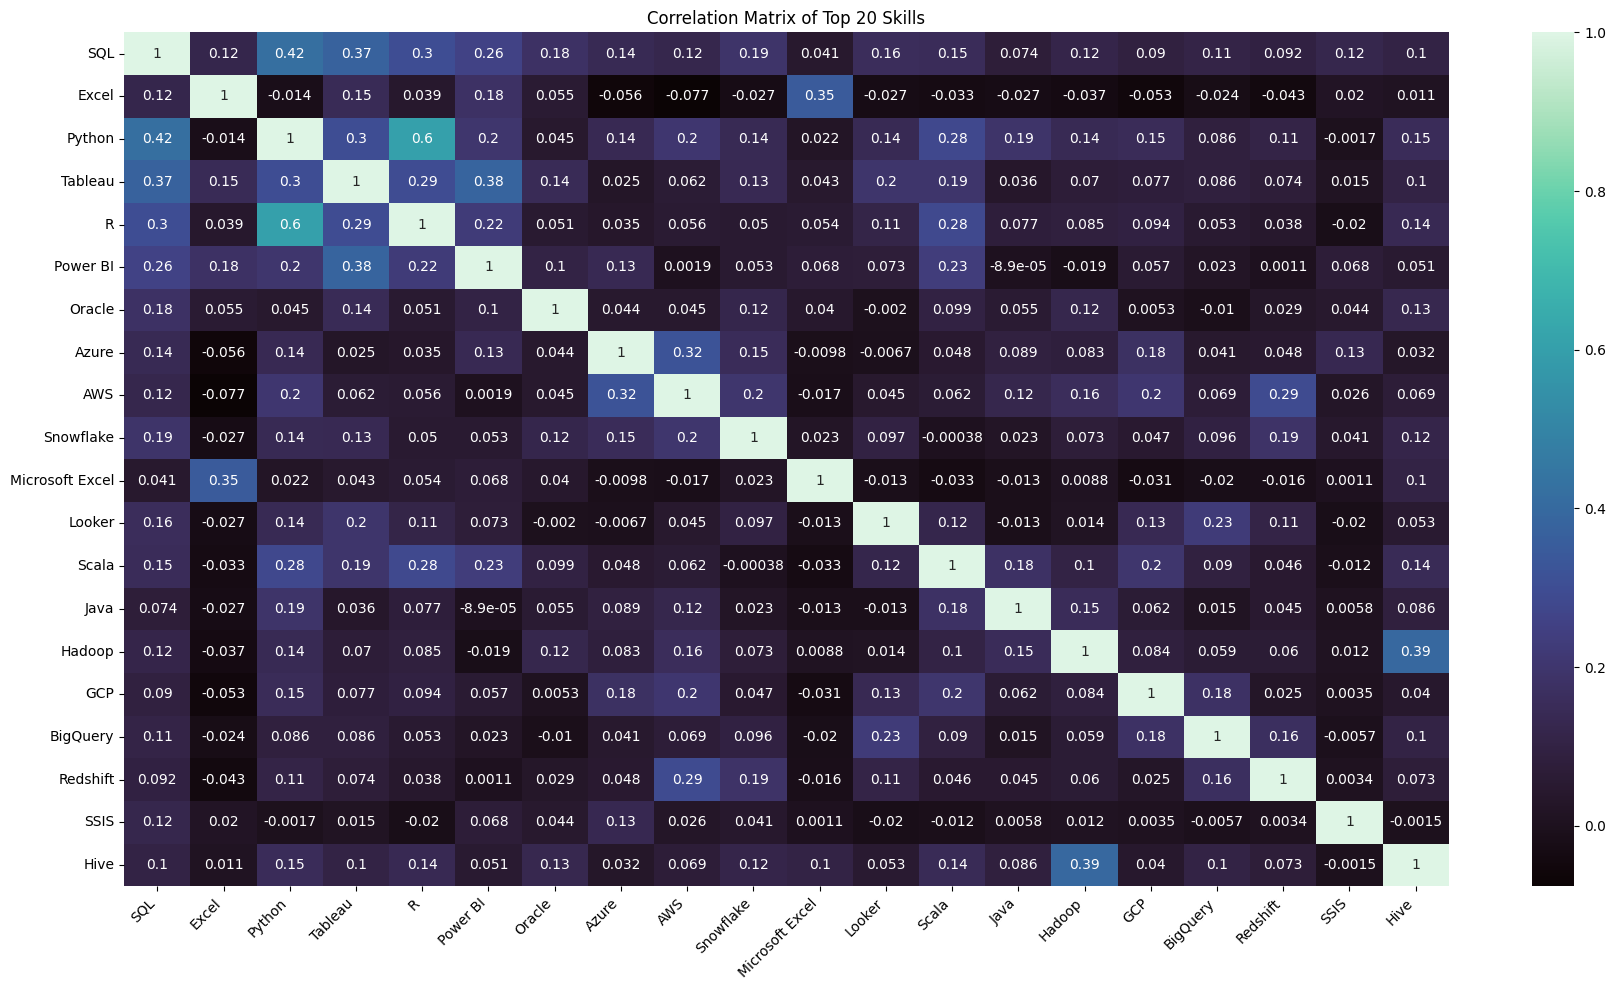

In [36]:
#  Get top 20 skills by sum 
skill_columns = [skill for skill in skills if skill in df.columns]
top_20_skills = df[skill_columns].sum().sort_values(ascending=False).head(20).index.tolist()

# Create correlation matrix only for those top 20 skills
correlation_matrix = df[top_20_skills].corr()

#  Plot heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='mako')
plt.title('Correlation Matrix of Top 20 Skills')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Data Transformation Reasoning**

During my EDA, one of the first steps I took was dropping most of the salary features along with `posted_at` and `thumbnail`. I dropped these columns because there wasn’t much data available, and I struggled to figure out how I would even transform most of the salary fields — especially considering how loosely they relate to `schedule_type`.

I moved on to identifying duplicates using the `job_id` column. After finding them, I dropped the duplicates and kept the `job_id` tied to the role that was posted first.

Next, I cleaned the `title` feature by removing any strange characters and then capitalizing the first letter of each word.

Three of my larger transformations included:  
- Creating two new columns from the `description` feature — one checking for experience requirements and the other for degree requirements  
- Attempting to extract specific job role titles from the dataset (though I didn’t commit that part to the final DataFrame)  
- Looping through the job descriptions to identify the most common skill requirements based on the role

All of this gave me a better sense of which columns were worth keeping, and how we could pull more value out of the unstructured text in the dataset.

